# Сборный проект (интернет-магазин игровых платформ)

#### Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## План работы
1. [Общая информация](#info)
2. [Предобработка данных](#preprocessing)
    - [Замена названий столбцов](#columns)
    - [Приведение данных к нужному типу](#datatype)
    - [Обработка пропусков](#misseddata)
    - [Суммарные продажи во всех регионах](#totalsales)
3. [Исследовательский анализ данных](#dataanalysis)
4. [Портрет пользователя каждого региона](#region)
    - [Самые популярные платформы (топ-5). Опишите различия в долях продаж.](#top5platforms)
    - [Самые популярные жанры (топ-5). Поясните разницу.](#top5genres)
    - [Влияет ли рейтинг ESRB на продажи в отдельном регионе?](#rating)
5. [Проверка гипотез](#hypotheses)
    - [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;](#platform_user_score)
    - [Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.](#genre_user_score)
6. [Общий вывод](#conclusion)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from datetime import datetime
import seaborn as sns

## 1. Общая информация о данных
<a id="info"></a>

Откроем данные и изучим о них общую информацию. 

In [ ]:
data = pd.read_csv('/datasets/games.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Вывод:
В первом блоке нашего исследования изучили информацию о представленных данных. Нам дана таблица с информацией о выпущенных играх, игровых платформах, годах производста, жанрах, их продажах в Северной Америке, Европе и Японии, а также информацией об оценке пользователей и критиков и рейтинге игр. Замечаем, что в данных присутствуют пропуски, также необходимо заменить тип некоторых данных. Все столбцы написаны с заглавной буквы, что усложнит впоследствие обращение к определенным столбцам, удобнее будет привести названия к нижнему регистру. В следующем разделе проведем предобработку данных. Затем на основе имеющихся данных проведем исследование и постараемся выявить определяющие успешность игры закономерности.

## 2. Преодобработка данных
<a id="preprocessing"></a>

Приведем названия столбцов к нижнему регистру, чтобы впоследствие было удобнее к ним обращаться.
<a id="columns"></a>

In [ ]:
data.columns = data.columns.str.lower()

In [ ]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Приведем данные к нужному типу
<a id="datatype"></a>

In [ ]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y').astype('datetime64[Y]')
data.info()
                                        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null datetime64[ns]
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.4+ MB


In [ ]:
data['year_of_release'] = data['year_of_release'].dt.year

In [ ]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


столбец `user_score` имеет тип вещественный тип данных. Заменим на числовой.

При попытке заменить методом astype тип на числовой, вылезает ошибка. Посмотрим на уникальные значения этого столбца

In [ ]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди чисел видим аббревиатуру tbd. Так как заменить эти данные мы ничем не сможем, заменим их на nan

In [ ]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [ ]:
data['user_score'] = data['user_score'].astype('float')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Обработаем пропуски
<a id="misseddata"></a>

In [ ]:
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [ ]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [ ]:
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Заменим пропуски в столбцах `user_score` и `critic_score` значениями, которых нет в данных. Например "-1". Нулями не заполняем, чтобы не смешались с реальным рейтингом равным нулю.

In [ ]:
#data['critic_score'] = data['critic_score'].fillna(-1)
#data['user_score'] = data['user_score'].fillna(-1)

In [ ]:
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [ ]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [ ]:
data['rating'] = data['rating'].fillna('Unknown')

In [ ]:
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
dtype: int64

Что касается пропусков в столбцах `name` и `genre`, то их всего по два в каждом столбце. Это очень маленькое значение. Можно было бы удалить эти строки вообще, но я считаю, что если мы их оставим, на исследовании они никак не повлияют. Плюс, ниже видим, что в этих строчках вообще мало полезных для исследования данных. На счет года выпуска, этих строчек 269, что также составляет очень малую долю от всех данных. Заполнить эти пропуски какими-либо реалистичными данными мы не можем, поэтому оставим так, как есть.
    
Значительное количество пропусков в таких столбцах, как `user_score`, `critic_score` и `rating` могли возникнуть вследствие ошибки при вводе данных или из-за непопулярности игр и изначальном отсутствии у них этих данных.

In [ ]:
data.loc[data['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,Unknown
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,Unknown


In [ ]:
len(data.loc[data['year_of_release'].isnull().sum()]) / len(data)

0.0006580915345498055

Посчитаем суммарные продажи во всех регионах и выведем в отдельный столбец
<a id="totalsales"></a>

In [ ]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [ ]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


### Вывод:
В данном блоке мы обработали пропуски данных, привели названия столбцов к нижнему регистру, заменили тип некоторых данных. Также добавили столбец с общими суммарными продажами по всем регионам. Теперь приступим к исследовательскому анализу данных.

## 3. Исследовательский анализ данных
<a id="dataanalysis"></a>

Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

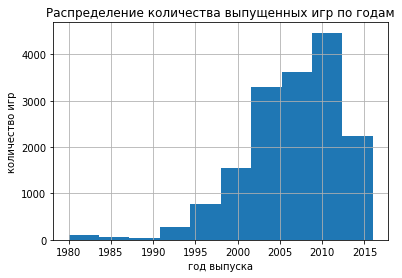

In [ ]:
data['year_of_release'].hist() 
plt.title('Распределение количества выпущенных игр по годам')
plt.xlabel('год выпуска')
plt.ylabel('количество игр')
plt.show()

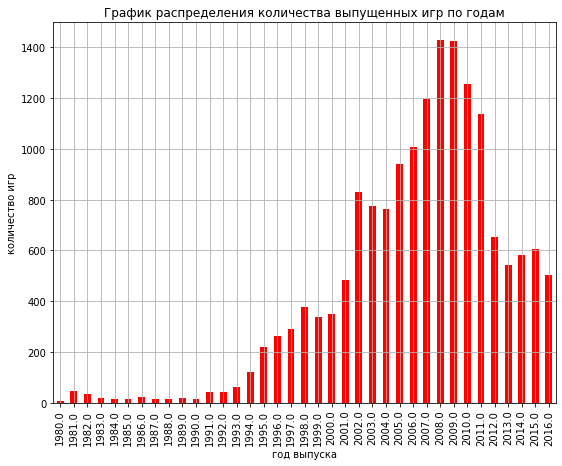

In [ ]:
data['year_of_release'].value_counts().sort_index()\
.plot(kind='bar', grid=True, figsize=(9,7), color='r')
plt.title('График распределения количества выпущенных игр по годам')
plt.xlabel('год выпуска')
plt.ylabel('количество игр')
plt.show()

Более подробный график распределения выпущенных игр по каждому году.

Резкий скачок в производстве игр наблюдается после 2000-х годов. С этого времени была произведена большая часть игр. Также, замечаем, что после 2008 года наблюдается снижение в количестве произведенных игр за год. 

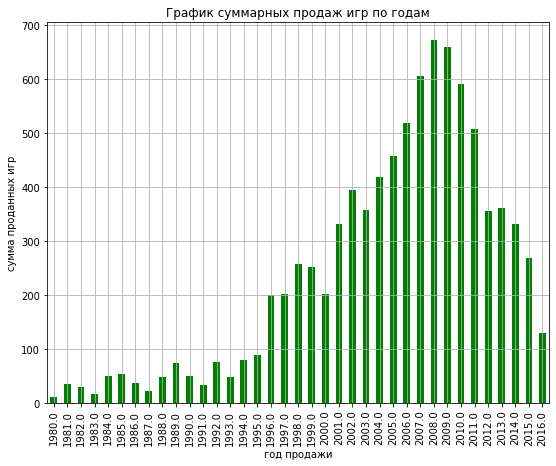

In [ ]:
data.groupby('year_of_release')['total_sales'].agg('sum')\
.plot(kind='bar', figsize=(9,7), grid=True, color='g')
plt.title('График суммарных продаж игр по годам')
plt.xlabel('год продажи')
plt.ylabel('сумма проданных игр')
plt.show()

Снижаются также и суммарные продажи в последние годы.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [ ]:
data.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

По суммарным продажам лидируют следующие платформы: Sony PlayStation2, Xbox 360, Wii, Sony PlayStation3.

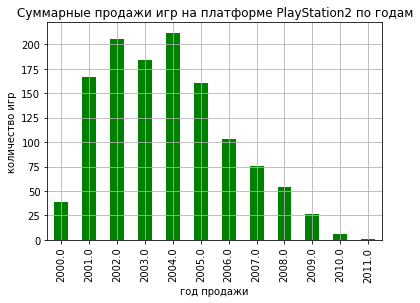

In [ ]:
data.loc[data['platform'] == 'PS2'].groupby('year_of_release')['total_sales']\
.agg('sum').plot(kind='bar', color='g', grid=True)
plt.title('Суммарные продажи игр на платформе PlayStation2 по годам')
plt.xlabel('год продажи')
plt.ylabel('количество игр')
plt.show()

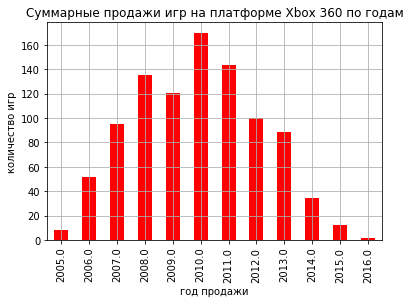

In [ ]:
data.loc[data['platform'] == 'X360'].groupby('year_of_release')['total_sales']\
.agg('sum').plot(kind='bar', color='r', grid=True)
plt.title('Суммарные продажи игр на платформе Xbox 360 по годам')
plt.xlabel('год продажи')
plt.ylabel('количество игр')
plt.show()

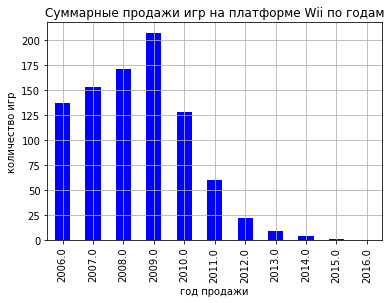

In [ ]:
data.loc[data['platform'] == 'Wii'].groupby('year_of_release')['total_sales']\
.agg('sum').plot(kind='bar',color='b', grid=True)
plt.title('Суммарные продажи игр на платформе Wii по годам')
plt.xlabel('год продажи')
plt.ylabel('количество игр')
plt.show()

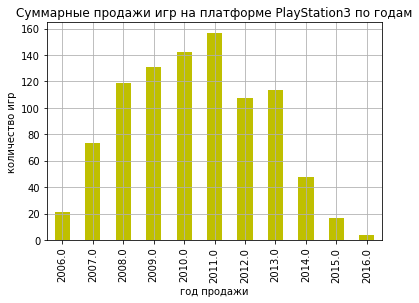

In [ ]:
data.loc[data['platform'] == 'PS3'].groupby('year_of_release')['total_sales'].agg('sum')\
.plot(kind='bar',color='y', grid=True)
plt.title('Суммарные продажи игр на платформе PlayStation3 по годам')
plt.xlabel('год продажи')
plt.ylabel('количество игр')
plt.show()

На графиках хорошо видно, что каждая из исследуемых платформ держится на рынке примерно 10 лет. При этом хочется отметить, что несмотря на лидирующие позиции четырех рассмотренных платформ, их продажи последние несколько лет падают.

Для исследования возьмем за актуальный период данные за последние пять лет.

In [ ]:
new_data = data.query('year_of_release >= 2012')

Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

In [ ]:
new_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index()\
.sort_values('total_sales', ascending=False)

,platform,total_sales
4,PS4,314.14
3,PS3,288.79
9,X360,236.54
0,3DS,194.61
10,XOne,159.32
8,WiiU,82.19
2,PC,62.65
6,PSV,49.18
7,Wii,35.37
1,DS,12.55


In [ ]:
sales_ps4 = new_data.loc[new_data['platform'] == 'PS4']\
.pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').reset_index()                                                                                                                                                                                         
sales_ps4

,year_of_release,total_sales
0,2013.0,25.99
1,2014.0,100.00
2,2015.0,118.90
3,2016.0,69.25


In [ ]:
sales_x360 = new_data.loc[new_data['platform'] == 'X360']\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
sales_x360

,year_of_release,total_sales
0,2012.0,99.74
1,2013.0,88.58
2,2014.0,34.74
3,2015.0,11.96
4,2016.0,1.52


In [ ]:
sales_3ds = new_data.loc[new_data['platform'] == '3DS']\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
sales_3ds

,year_of_release,total_sales
0,2012.0,51.36
1,2013.0,56.57
2,2014.0,43.76
3,2015.0,27.78
4,2016.0,15.14


In [ ]:
sales_ps3 = new_data.loc[new_data['platform'] == 'PS3']\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
sales_ps3

,year_of_release,total_sales
0,2012.0,107.36
1,2013.0,113.25
2,2014.0,47.76
3,2015.0,16.82
4,2016.0,3.60


In [ ]:
sales_xone = new_data.loc[new_data['platform'] == 'XOne'].pivot_table(index='year_of_release',\
                                                                      values='total_sales', aggfunc='sum').reset_index()
sales_xone

,year_of_release,total_sales
0,2013.0,18.96
1,2014.0,54.07
2,2015.0,60.14
3,2016.0,26.15


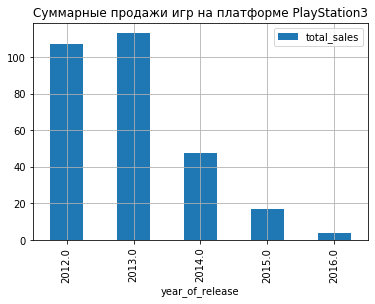

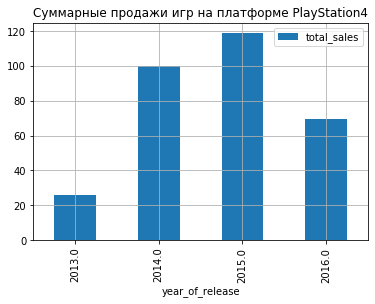

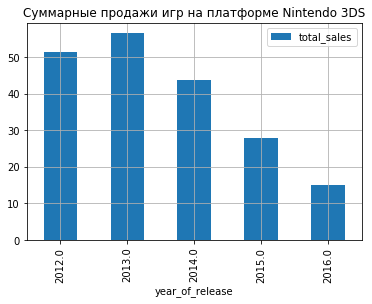

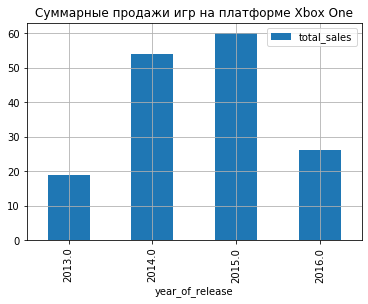

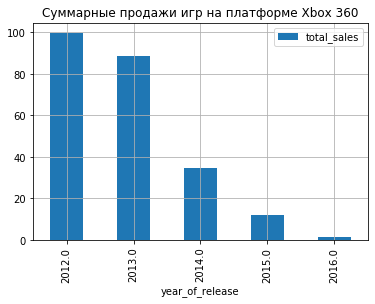

In [ ]:
sales_ps3.plot(x='year_of_release', y='total_sales', grid=True, kind='bar')
plt.title('Суммарные продажи игр на платформе PlayStation3')
sales_ps4.plot(x='year_of_release', y='total_sales', grid=True, kind='bar')
plt.title('Суммарные продажи игр на платформе PlayStation4')
sales_3ds.plot(x='year_of_release', y='total_sales', grid=True, kind='bar')
plt.title('Суммарные продажи игр на платформе Nintendo 3DS')
sales_xone.plot(x='year_of_release', y='total_sales', grid=True, kind='bar')
plt.title('Суммарные продажи игр на платформе Xbox One')
sales_x360.plot(x='year_of_release', y='total_sales', grid=True, kind='bar')
plt.title('Суммарные продажи игр на платформе Xbox 360')
plt.show()

Выбрали 5 потенциально прибыльных платформ: PlayStation4, PlayStation3, Xbox One, Xbox 360 и Nintendo 3DS. Продажи игр на всех пяти платформах за последние годы снижаются.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

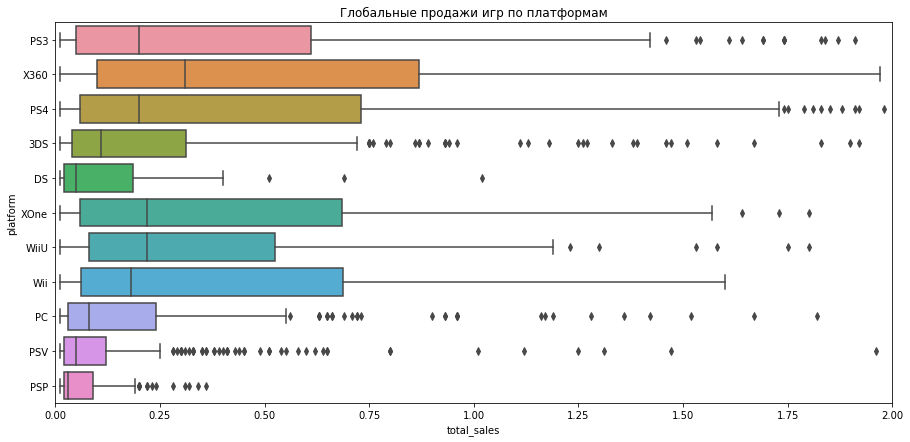

In [ ]:
fig, ax = plt.subplots(figsize = (15,7))
sns.boxplot(data = new_data, x= 'total_sales', y = 'platform', orient = 'h')
plt.xlim(0,2)
plt.title('Глобальные продажи игр по платформам')
plt.show()

По графику можем сказать, что наиболее продаваемы игры на платформах Xbox 360, PlayStation 3 и 4.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Для примера возьмем платформу Sony PlayStation4

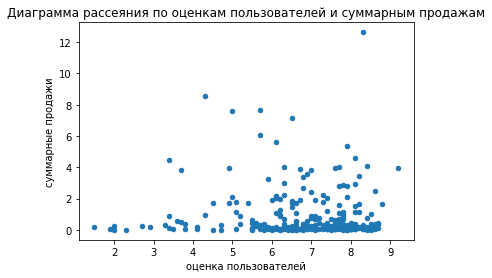

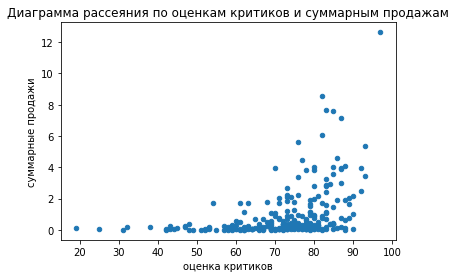

In [ ]:
ps4 = new_data.loc[(new_data['platform'] == 'PS4') & (new_data['user_score'] >=0)\
                   & (new_data['critic_score'] >= 0)]
ps4.plot(kind= 'scatter', x='user_score', y = 'total_sales')
plt.xlabel('оценка пользователей')
plt.ylabel('суммарные продажи')
plt.title('Диаграмма рассеяния по оценкам пользователей и суммарным продажам')
ps4.plot(kind= 'scatter', x='critic_score', y = 'total_sales')
plt.xlabel('оценка критиков')
plt.ylabel('суммарные продажи')
plt.title('Диаграмма рассеяния по оценкам критиков и суммарным продажам')
plt.show()

По графикам вполне заметно, что продажи игр прямопропорциональны их оценкам со стороны как пользователей, так и критиков. Хотя у пользователей наблюдаются отдельные выбросы больших продаж при меньших значениях рейтинга. Посмотрим на корреляцию.

In [ ]:
ps4[['total_sales', 'user_score', 'critic_score']].corr()

,total_sales,user_score,critic_score
total_sales,1.000000,-0.033625,0.405895
user_score,-0.033625,1.000000,0.557654
critic_score,0.405895,0.557654,1.000000


Рассчитав корреляцию видим, что зависимости между отзывами пользователей и продажами нет, значение отрицательное. А вот зависимость между оценкой критиков и продажами прослеживается лучше, значение больше нуля.

Посмторим на другие платформы

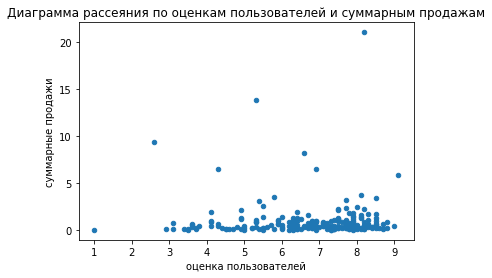

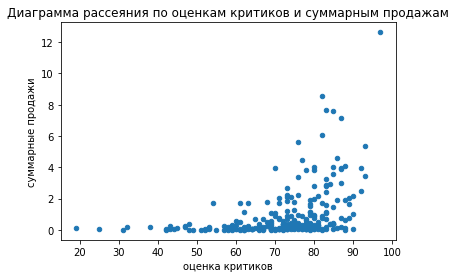

In [ ]:
ps3 = new_data.loc[(new_data['platform'] == 'PS3') & (new_data['user_score'] >=0)\
                   & (new_data['critic_score'] >= 0)]
ps3.plot(kind= 'scatter', x='user_score', y = 'total_sales')
plt.xlabel('оценка пользователей')
plt.ylabel('суммарные продажи')
plt.title('Диаграмма рассеяния по оценкам пользователей и суммарным продажам')
ps4.plot(kind= 'scatter', x='critic_score', y = 'total_sales')
plt.xlabel('оценка критиков')
plt.ylabel('суммарные продажи')
plt.title('Диаграмма рассеяния по оценкам критиков и суммарным продажам')
plt.show()

In [ ]:
ps3[['total_sales', 'user_score', 'critic_score']].corr()

,total_sales,user_score,critic_score
total_sales,1.000000,0.003227,0.331057
user_score,0.003227,1.000000,0.539456
critic_score,0.331057,0.539456,1.000000


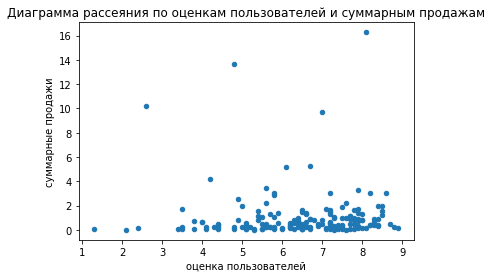

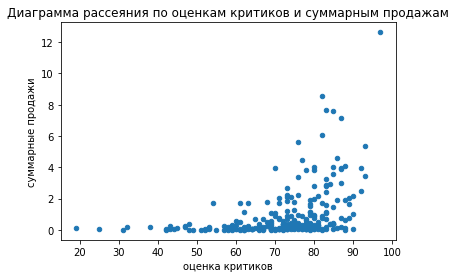

In [ ]:
x360 = new_data.loc[(new_data['platform'] == 'X360') & (new_data['user_score'] >=0)\
                   & (new_data['critic_score'] >= 0)]
x360.plot(kind= 'scatter', x='user_score', y = 'total_sales')
plt.xlabel('оценка пользователей')
plt.ylabel('суммарные продажи')
plt.title('Диаграмма рассеяния по оценкам пользователей и суммарным продажам')
ps4.plot(kind= 'scatter', x='critic_score', y = 'total_sales')
plt.xlabel('оценка критиков')
plt.ylabel('суммарные продажи')
plt.title('Диаграмма рассеяния по оценкам критиков и суммарным продажам')
plt.show()

In [ ]:
x360[['total_sales', 'user_score', 'critic_score']].corr()

,total_sales,user_score,critic_score
total_sales,1.000000,-0.002014,0.360573
user_score,-0.002014,1.000000,0.557352
critic_score,0.360573,0.557352,1.000000


Сравнив выводы по платформе PS4 еще с двумя популярными платформами (PS3 и X360) видим, что зависимость продаж и оценок пользователей так же, как и в первом случае плохо прослеживается. А прямопропорциональность зависимости оценки критиков и продажи в целом хорошо заметна.

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

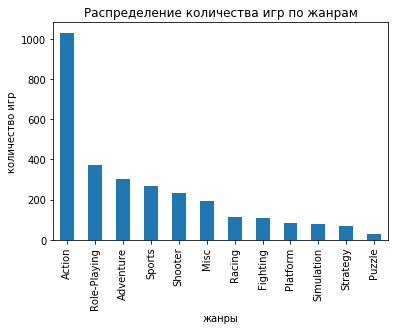

In [ ]:
new_data.groupby('genre')['name'].agg('count').sort_values(ascending=False).plot(kind='bar')
plt.title('Распределение количества игр по жанрам')
plt.xlabel('жанры')
plt.ylabel('количество игр')
plt.show()

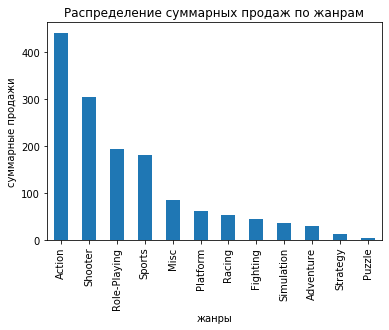

In [ ]:
new_data.groupby('genre')['total_sales'].agg('sum').sort_values(ascending=False).plot(kind='bar')
plt.title('Распределение суммарных продаж по жанрам')
plt.xlabel('жанры')
plt.ylabel('суммарные продажи')
plt.show()

Четверку лидеров, как по количеству игр, так и по продажам занимают такие жанры как экш, ролевые, спортивные игры и стрелялки. Самые же непопулярные игры-головоломки.

### Вывод:
Проанализировав данные игровой идустрии за пять лет, можем отметить, что даже у таких лидеров, как PlayStation, Xbox и Nintendo как продажи, так и количество выпускаемых игр значительно сокращается. Что касается жанров, пользователи предпочитают экшен-игры, а вот головоломки оказались самыми непопулярными.

## Шаг 4. Составьте портрет пользователя каждого региона
<a id="region"></a>

### Самые популярные платформы (топ-5).
<a id="to5platforms"></a>

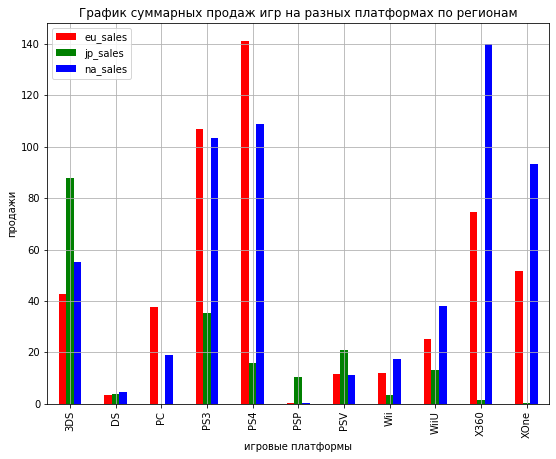

In [ ]:
new_data.pivot_table(index='platform', values=['eu_sales', 'na_sales', 'jp_sales'],\
                     aggfunc='sum').plot(kind='bar', color=['r','g','b'], figsize=(9,7), grid=True)
                                        
                                         
plt.title('График суммарных продаж игр на разных платформах по регионам')
plt.xlabel('игровые платформы')
plt.ylabel('продажи')
plt.show()

Найдем пять самых популярных платформ в каждом регионе.

In [ ]:
na = new_data.groupby(by='platform').agg({'na_sales':'sum'}).reset_index()\
.sort_values(by='na_sales', ascending=False).head(5)
na['percent'] = na['na_sales'] / new_data['na_sales'].sum() * 100
na

,platform,na_sales,percent
9,X360,140.05,23.698326
4,PS4,108.74,18.400257
3,PS3,103.38,17.493274
10,XOne,93.12,15.757145
0,3DS,55.31,9.359189


In [ ]:
eu = new_data.groupby(by='platform').agg({'eu_sales':'sum'}).reset_index()\
.sort_values(by='eu_sales', ascending=False).head(5)
eu['percent'] = eu['eu_sales'] / new_data['eu_sales'].sum() * 100
eu

,platform,eu_sales,percent
4,PS4,141.09,27.838286
3,PS3,106.86,21.084409
9,X360,74.52,14.703445
10,XOne,51.59,10.179156
0,3DS,42.64,8.413243


In [ ]:
jp = new_data.groupby(by='platform').agg({'jp_sales':'sum'}).reset_index()\
.sort_values(by='jp_sales', ascending=False).head(5)
jp['percent'] = jp['jp_sales'] / new_data['jp_sales'].sum() * 100
jp

,platform,jp_sales,percent
0,3DS,87.79,45.586250
3,PS3,35.29,18.324852
6,PSV,21.04,10.925330
4,PS4,15.96,8.287465
8,WiiU,13.01,6.755634


В Америке наиболее популярна  американская платформа Xbox 360, в Европе играют в японскую Playstation 4 и 3. В Японии почти половина проданных игр приходится на свою же Nintendo 3DS.

### Самые популярные жанры (топ-5). 
<a id="top5genres"></a>

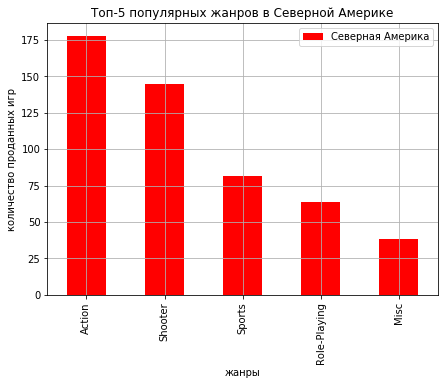

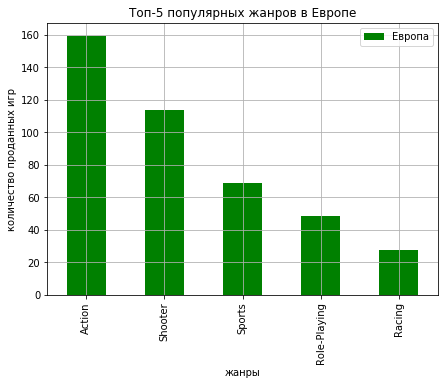

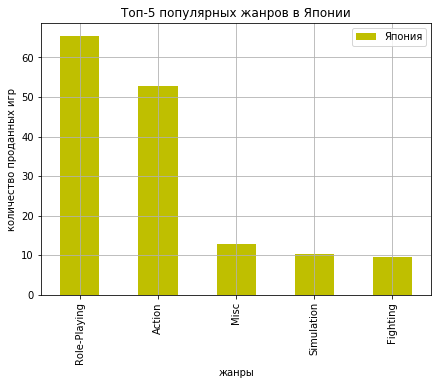

In [ ]:
new_data.pivot_table(index='genre', values='na_sales',aggfunc='sum').reset_index()\
.sort_values(by='na_sales',ascending=False).head(5)\
.plot(x='genre', y='na_sales', kind='bar', grid=True, color='r', label='Северная Америка', figsize=(7,5))
plt.title('Топ-5 популярных жанров в Северной Америке')
plt.xlabel('жанры')
plt.ylabel('количество проданных игр')

new_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').reset_index()\
.sort_values(by='eu_sales', ascending=False).head(5)\
.plot(x='genre', y='eu_sales', kind='bar', grid=True, color='g', label='Европа', figsize=(7,5))
plt.title('Топ-5 популярных жанров в Европе')
plt.xlabel('жанры')
plt.ylabel('количество проданных игр')

new_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').reset_index()\
.sort_values(by='jp_sales', ascending=False).head(5)\
.plot(x='genre', y='jp_sales', kind='bar', grid=True, color='y', label='Япония', figsize=(7,5))
plt.title('Топ-5 популярных жанров в Японии')
plt.xlabel('жанры')
plt.ylabel('количество проданных игр')
plt.show()

Замечаем, что в японии лидируют ролевые игры в то время как в Америке и Европе экшен игры. С чем это может быть связано? В целом ролевые и экшн игры примерно похожи друг на друга и зачастую игры могут относится сразу к нескльким жанрам. Посмотрим на популярные в японии игры жанра ролевых игр.

In [ ]:
new_data[new_data['genre'] == 'Role-Playing'].sort_values(by='jp_sales', ascending=False)['name'].head(10)

33                            Pokemon X/Pokemon Y
385                              Monster Hunter 4
412                     Yokai Watch 2 Ganso/Honke
83                Pokemon Black 2/Pokemon White 2
47      Pokemon Omega Ruby/Pokemon Alpha Sapphire
563                        Yokai Watch 2 Shinuchi
312                     Monster Hunter 4 Ultimate
108                              Pokemon Sun/Moon
1244                             Puzzle & Dragons
798                                   Yokai Watch
Name: name, dtype: object

Сразу замечаем, что большинство из представленных игр вроде Pokemon и Yokai watch, которые произведены в Японии и логично, что наиболее популярны именно у себя на родине.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?
<a id="rating"></a>

Посмотрим, игры с каким рейтингом наиболее поппулярны в разных регионах.

In [ ]:
rating_region = new_data[new_data['rating'] != 'Unknown']\
.pivot_table(index='rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()
rating_region

,rating,eu_sales,jp_sales,na_sales
0,E,113.03,28.33,114.37
1,E10+,55.37,8.19,75.70
2,M,193.96,21.20,231.57
3,T,52.96,26.02,66.02


- E - everyone(для всех возрастов)
- E10+ - everyone 10 and older(для всех старше 10)
- M - mature (для лиц 17 лет и старше)
- T - Teen (для подростков 13-19 лет)

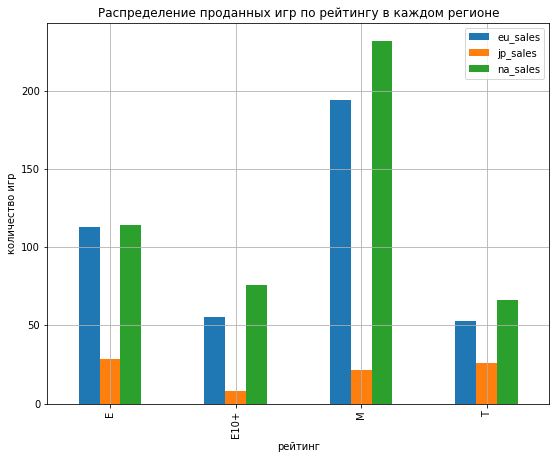

In [ ]:
rating_region.plot(figsize=(9,7), grid=True, kind='bar', x='rating')
plt.title('Распределение проданных игр по рейтингу в каждом регионе')
plt.xlabel('рейтинг')
plt.ylabel('количество игр')
plt.show()

[]

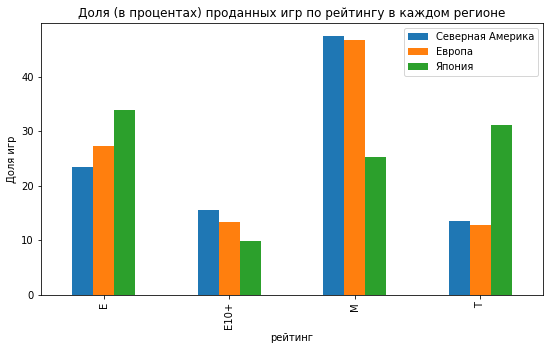

In [ ]:
rating_region['percent_na'] = rating_region['na_sales'] / rating_region['na_sales'].sum() *100
rating_region['percent_eu'] = rating_region['eu_sales'] / rating_region['eu_sales'].sum() *100
rating_region['percent_jp'] = rating_region['jp_sales'] / rating_region['jp_sales'].sum() *100
rating_region.plot(kind='bar', x='rating', y=['percent_na', 'percent_eu', 'percent_jp'], figsize=(9,5),\
                   label=['Северная Америка', 'Европа', 'Япония'])
plt.title('Доля (в процентах) проданных игр по рейтингу в каждом регионе')
plt.xlabel('рейтинг')
plt.ylabel('Доля игр')
plt.plot()

### Вывод:
График распределения проданных игр по жанрам хорошо иллюстрирует, что в Европе и Америки продажи по рейтингам очень схожи друг с другом. Тут лидируют продажи игр для 17 и страше, а также для всех возрастов. В японии же продажи по всем рейтингам примерно одинаковые, чуть меньше приходится на игры для 10 лет и старше.
Проанализировав данные по популярности игровых жанров в регионах, отметив тот факт, что Европа и Америка играет в экшен-игры, а Япония предпочитает ролевые игры.
Что касается игровых платформ, в Америке наиболее популярна американская платформа Xbox 360, в Европе играют в японскую Playstation 4 и 3. В Японии почти половина проданных игр приходится на свою же Nintendo 3DS.

## Шаг 5. Проверьте гипотезы
<a id="hypotheses"></a>

Сформулируем нулевую гипотезу(Н0), что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Соответственно альтернативная гипотеза(Н1): средние пользовательские рейтинги платформ Xbox One и PC разные.
<a id="platform_user_score"></a>

In [ ]:
xbox = new_data[(new_data['platform'] == 'XOne') & (new_data['user_score'] >= 0)]['user_score']
pc = new_data[(new_data['platform'] == 'PC') & (new_data['user_score'] >= 0)]['user_score']

Найдем дисперсию выборок.

In [ ]:
xbox.var()

1.9069968429360695

In [ ]:
pc.var()

2.770443997158418

Проверим нулевую гипотезу.

In [ ]:
result = st.ttest_ind(xbox, pc, equal_var=False)
alpha = .05
print('p-значение:', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


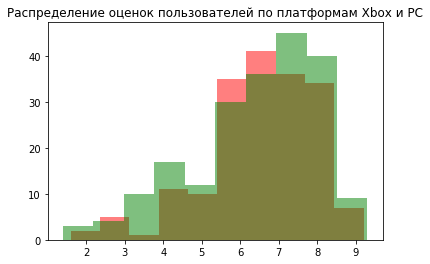

In [ ]:
plt.hist(xbox, color='r', alpha=0.5)
plt.hist(pc, alpha=0.5, color='g')
plt.title('Распределение оценок пользователей по платформам Xbox и PC')
plt.show()

In [ ]:
xbox.mean()

6.521428571428572

In [ ]:
pc.mean()

6.4286407766990274

Проверив гипотезу, можем сказать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. График и средние выборки также иллюстрируют, что данные очень схожи между собой.

Проверим нулевую гипотезу(Н0), что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые. В качестве альтернативной гипотезы предположим, что средние пользовательские рейтинги представленных выше жанров разные.
<a id="genre_user_score"></a>

In [ ]:
action = new_data[(new_data['genre'] == 'Action') & (new_data['user_score'] >= 0)]['user_score']
sports = new_data[(new_data['genre'] == 'Sports') & (new_data['user_score'] >= 0)]['user_score']

In [ ]:
action.var()

1.8890840494348111

In [ ]:
sports.var()

3.022890298704732

In [ ]:
results = st.ttest_ind(action, sports, equal_var=False)
alpha = .05
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


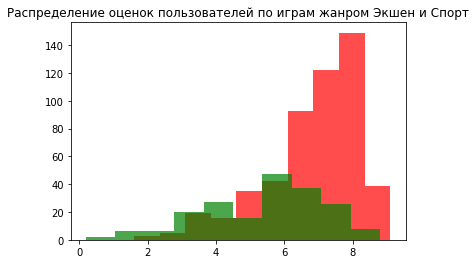

In [ ]:
plt.hist(action, color='r', alpha=0.7)
plt.hist(sports, alpha=0.7, color='g')
plt.title('Распределение оценок пользователей по играм жанром Экшен и Спорт')
plt.show()

In [ ]:
action.mean()

6.825047801147227

In [ ]:
sports.mean()

5.455897435897437

### Вывод:

Проверив две нулевые гипотезы, можем сказать, что средние пользовательские рейтинги игр на платформах Xbox One и PC одинаковые. А средние пользовательские рейтинги игр с жанрами экшен и спорт разные.

## Шаг 6. Напишите общий вывод
<a id="conclusion"></a>

Подводя итог проведенного исследования можно сделать следующие выводы:
- большая часть игр выпускалась в период с 2000 по 2010 года.
- в последние несколько лет как продажи игр, так и их количество значительно уменьшилось. Период 2000-10-х годов можно назвать "игровым бумом", когда с развитием технологий стали появляться новые игровые платформы, каждая из которых стремилась завоевать своего потребителя, выпуская все новые и новые игры. В последние же годы, пусть игр стало и меньше, но вероятнее игры стали более качественнее и новые появляются уже не так часто, как раньше.
- конечно, чтобы сделать точный вывод о причине снижения производства игр, нужно исследовать дополнительные данные, но попробуем предположить, что это связано с тем, что многие переходят на игры мобильных приложений, которые зачастую бесплатные. Также разработка игр стала занимать больше времени, графика, качество игры стало лучше. Кроме того время на прохождение игры с годами увеличивается, требуется больше времени, чтобы пройти игру, с чем может и быть связано уменьшение продаж.
- По суммарным продажам за последние 5 лет лидируют игры платформ Sony PlayStation4 и 3, Xbox360 и Nintendo 3DS.
- Что касается жанров, то здесь лидируют как по количеству игр, так и по продажам такие жанры, как экшен, ролевые, спортивные игры и стрелялки. Самые же непопулярные игры-головоломки.
- В Америке почти четверть продаж игр приходится на принадлежащей Microsoft платформу Xbox 360. В Европе больше предпочитают японскую Sony PlayStation4. А в Японии предпочтение отдают играм на Nintendo 3DS, произведенной там же.
- Проверив сформулированные гипотезы, можем сказать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а вот средние пользовательские рейтинги игр жанров экшен и спортивных игр разные.
- Также мы исследовали, зависят ли продажи от оценок пользователей и критиков.В ходе анализа пришли к выводу, что оценки пользователей на продажи не влияют, о чем свидетельствует график рассеяния и показатель корреляции. А вот критикам пользователи доверяют и стараются покупать игры с более высокой оценкой критиков. 
    
    Выводы по регионам: 
    
    
- Северная Америка

По продажам первое место (1/4 всех продаж) занимает игровая платформа Xbox 360, принадлежащая компании Microsoft. 2,3 и 4 место с примерно одинаковыми долями продаж приходится на PlayStation4 и 3 и Xbox One.
Тройку самых популярных жанров составляют экшен, стрелялки и спортивные игры. По рейтингу лидируют продажи игр для 17 лет и старше и для всех возрастов.

- Европа

Европейцы отдают предпочтения играм на японских платформах PlayStation4 и 3, на третьем месте американская платформа Xbox 360. 
Европа в плане жанров солидарна с Америкой. Здесь так же препочитают экшены, стрелялки и спортивные игры. Основная часть продаж приходится на игры с рейтингом 17 и старше и для всех возрастов.

- Япония

В Японии популярны платформы собственного производства. Почти половина всех проданных игр приходится на платформу Nintendo 3DS. На втором месте Sony PlayStation3 и на третьем Sony PlayStation Vita. Американские Xbox не входят в пятерку популярных игровых платформ у японцев.
Что касается жанров, с большим отрывом лидируют ролевые и экшен игры. По жанрам продажи распределены примерно одинаково. Меньшая доля приходится на игры для 10 лет и старше.